# Laboratorio 4 - Parte 2

### Redes Neuronales Artificiales: RNN y SOM

### 2019-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer Integrante:
#### Segundo Integrante:

In [57]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")


## Ejercicio 1

En este ejercicio vamos a utilizar dos bases de datos diferentes para entrenar dos mapas auto-organizables.

1. La base de datos iris 
2. La base de datos de dígitos escritos. 

Si bien en estas dos bases de datos las muestras cuentan con etiquetadas de salida, las vamos a usar para evaluar el agrupamiento que produce un SOM, es decir que **no usaremos las etiquetas** e intentaremos que el modelo descubra los grupos de muestras similares que hay en los datos. Tenga en cuenta el número de clases en cada una de las bases de datos para los análisis posteriores.

In [133]:
from sklearn.datasets import load_iris
from numpy import random
import sompy
import sys
sys.path.insert(0, '../../library/')
from sklearn.preprocessing import StandardScaler
import showsompy as sm


data = load_iris()
X_iris = data.data
#Definimos una lista de colores de acuerdo con las clases originales
colors = ["red"] * 50
colors.extend(["yellow"] * 50)
colors.extend(["blue"] * 50)

In [134]:
#Normalizar
random.seed(19680801)
scaler = StandardScaler()
Xn = scaler.fit_transform(X_iris)
n_columns = 50
n_rows =50

Para el trabajo usaremos el paquete SOMPY, use la siguiente instrucción

```
!pip3 install git+https://github.com/sevamoo/SOMPY.git
```
La documentación se pueden consultar en : https://github.com/sevamoo/SOMPY. 

Complete el siguiente código para entrenar un SOM con los datos almacenados en la variable Xn (Datos normalizados), use una cuadrícula de neuronas de 50 por 50 y un número de épocas igual a 100. 

In [ ]:
mapsize = [n_columns,n_rows]
component_names = ['sepal length','sepal width', 'petal length','petal width']
som_iris = ...

Una vez entrenado el modelo ejecute la siguiente celda, la cuál grafica la matriz U extraída del SOM:

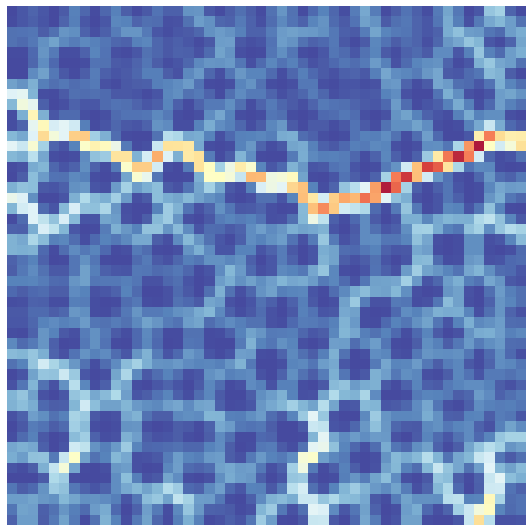

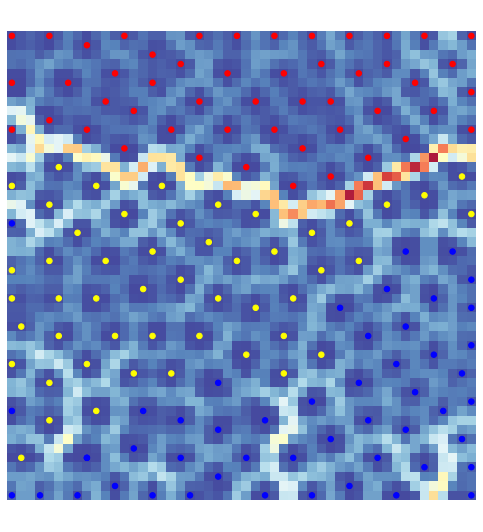

array([[0.00130915, 0.0265233 , 0.05110434, ..., 0.29383149, 0.05263512,
        0.00746035],
       [0.00733624, 0.02616161, 0.0429902 , ..., 0.2232612 , 0.16760343,
        0.07782442],
       [0.07876545, 0.08046698, 0.08420378, ..., 0.06543035, 0.1644772 ,
        0.200575  ],
       ...,
       [0.16578788, 0.1654493 , 0.18080547, ..., 0.29949734, 0.07098067,
        0.08092326],
       [0.0849393 , 0.17924206, 0.16819699, ..., 0.1150859 , 0.0644306 ,
        0.07996951],
       [0.04836178, 0.16648788, 0.16547268, ..., 0.01885426, 0.01700171,
        0.02265264]])

In [136]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

umat = u.build_u_matrix(som_iris, distance=1, row_normalized=False)
sm.show(umat,som_iris, show_data=False)
sm.show(umat,som_iris,colors=colors)

Responda:

1.1 ¿Qué es la matrix U (En inglés U-matrix) de un SOM?

R/

1.2 ¿Cómo se pueden interpretar las gráficas obtenidas en el punto anterior? Describa detalladamente lo que observa e interprételo de acuerdo con la definición que dio en el punto 1.1

R/

Ejecute la siguiente instrucción:

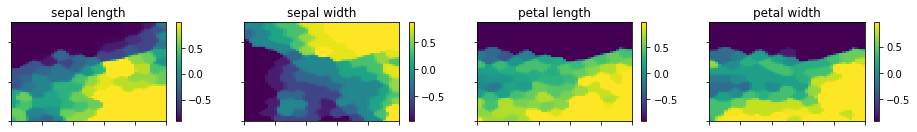

In [70]:
from sompy.visualization.mapview import View2D
view2D  = View2D(100,100,"rand data",text_size=10)
view2D.show(som_iris, col_sz=4, which_dim="all", denormalize=True)

Responda:

1.3 ¿Qué se está gráficando en las figuras? 

R/

1.4 ¿Qué utilidad tienen las gráficas anteriores?

R/

1.5 ¿De acuerdo con las gráficas anteriores cuáles variables en el problema están correlacionadas?

R/

In [63]:
codebook = som_iris._normalizer.denormalize_by(som_iris.data_raw, som_iris.codebook.matrix)
mp = codebook.reshape(som_iris.codebook.mapsize[0],som_iris.codebook.mapsize[1],codebook.shape[1])
mp.shape

(50, 50, 4)

## Ejercicio 2

Repita el proceso anterior para los datos del problema de reconocimiento de dígitos escritos a mano. Ejecute la siguiente celda para cargar los datos

In [96]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X_digits = data
Y = digits.target

#Definimos una lista de colores de acuerdo con las clases en Y
color_digits = []
for i in range(len(Y)):
    if Y[i] == 0:
        color_digits.append('red')
    elif Y[i] == 1:
        color_digits.append('blue')
    elif Y[i] == 2:
        color_digits.append('green')
    elif Y[i] == 3:
        color_digits.append('yellow')

In [ ]:
random.seed(19680801)
scaler = StandardScaler()
Xn_dig = scaler.fit_transform(X_digits);

map_size = [50,50]

Entrene un SOM a partir de los datos cargados en la celda anterior. En este caso utilice un SOM con una capa de neuronas 50x50.

In [140]:
som_digits = ...

Una vez entrenado el SOM, ejecute la siguiente celda

In [ ]:
u_digits = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

umat_digits = u_digits.build_u_matrix(som_digits, distance=1, row_normalized=False)
print(umat_digits.shape)
sm.show(umat_digits,som_digits, show_data=False)
sm.show(umat_digits,som_digits,colors=color_digits)

Responda:

2.1 ¿Qué diferencia observa entre la matrix U en este caso vs el anterior?

R/

2.2 ¿Qué puede concluir a partir de la gráfica que incluye la ubicación de las neuronas ganadoras para cada muestra de entrada?

R/

## Ejercicio 3

En este ejercicio entrenaremos una Red Neuronal Recurrente para la predicción de una serie de tiempo. Este problema corresponde a una configuración many-to-many. En este caso usaremos una serie de tiempo que corresponde al número de pasajeros internacionales por mes, desde el año 1949 hasta el año 1960. La serie de tiempo puede ser consultada en: https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line 

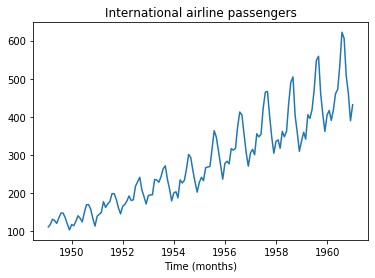

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('DB/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
#---- Tiempos para los datos originales---
date_begin = np.datetime64('1949-01')
date_end = np.datetime64('1961-01')
Time = pd.date_range(date_begin, date_end, freq='M')

plt.plot(Time,dataset)
plt.title('International airline passengers')
plt.xlabel('Time (months)')
plt.show()

El paquete que usaremos en este caso para el entrenamiento de redes neuronales recurrentes es neurolab.
Use la instrucción:
```!pip3 install neurolab
```
La documentación puede ser consultada en : https://pythonhosted.org/neurolab/.

In [108]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 

3.1 Complete el código siguiente y entrene una red neuronal recurrente de Elman, con una capa oculta y una capa de salida. Use función de activación tangente hiperbólica para la capa oculta y lineal para la capa de salida. Use un número de épocas igual a 1000, y un objetivo de error inferior a 0.00001. Inicialice los pesos de las capas aleatoriamente entre [-0.1, 0.1].

In [ ]:
import neurolab as nl
from sklearn.preprocessing import MinMaxScaler
random.seed(19680801)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t-look_back+1:t and Y=t+1
look_back = 1 # Retardos de tiempo por muestra
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#Esta variable se requiere para definir la red de acuerdo con la librería neurolab. Define el número de entradas y el rango de valores que toma cada entrada
layers = []
for i in range(look_back):
    layers.append([0, 1])

# Crear la red e inicializar los pesos. 
net = ....

# Entrenar la red con los datos de entrenamiento

# Evaluar la red con los datos de test
output = ...

# Calculo de error
Error = MAPE(output,testY)

print('MAPE = ' + str(np.mean(Error)))

3.1 Haga una gráfica de la salida real vs la mejor predicción hecha por la red. Recuerde incluir los tiempos apropiados en el eje x y usar el método plt.legend() para identificar cuál es la serie real y cual la predicción.

In [ ]:
# Gráfica
plt...

3.2 Una vez compoletado el código realice los experimentos necesarios para llenar la siguiente tabla: 

In [116]:
import pandas as pd
import qgrid
df_types = pd.DataFrame({
    'Retardos de tiempo por muestra' : pd.Series([1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4]),
    'Neuronas por capa' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})

df_types["MAPE"] = ""
df_types["MAPE"][0] = "0.124732765"
df_types.set_index(['Retardos de tiempo por muestra','Neuronas por capa'], inplace=True)
df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [138]:
qgrid_widget.get_changed_df()

MAPE
Retardos de tiempo por muestra Neuronas por capa             
1                              5                  0.124732765
                               10                            
                               15                            
                               20                            
                               25                            
                               30                            
2                              5                             
                               10                            
                               15                            
                               20                            
                               25                            
                               30                            
3                              5                             
                               10                            
                               15                            
                               20                            
                               25                            
                               30                            
4                              5                             
                               10                            
                               15                            
                               20                            
                               25                            
                               30

Responda:

3.3 ¿Cuál fue la mejor configuración encontrada?

R/

3.4 ¿Porqué seguir aumentando los tiempos de retardo no implica siempre una mejora en la predicción del modelo?

R/

## *Ejercicio 4

Este ejercicio es opcional. Use una red neuronal tipo MLP para reolver el mismo problema de predicción del número de pasajeros y compare el resultado con el obtenido usando la red recurrente.